<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/Regression_SimpleLinearRegression_Analysis_on_salary_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple Linear Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns

##Linear regression on dummy data

In [ ]:
x=[1,2,3,4,5]
y=[2,4,5,4,5]

In [ ]:
#model performs matrix multiplication so that reshape the array in 2d
x=np.array(x).reshape(-1,1)
y=np.array(y)

In [ ]:
model=LinearRegression()
model.fit(x,y)
ypred=model.predict(x)

In [ ]:
#y intercept
print(model.intercept_)
#slope
print(model.coef_)
# r square
print(model.score(x,y))

2.2
[0.6]
0.6000000000000001


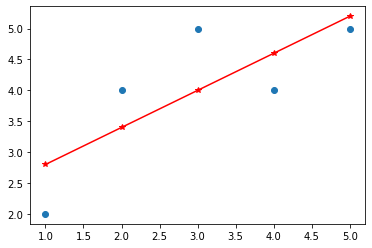

In [ ]:
plt.scatter(x,y)
plt.plot(x,ypred, color='r', marker="*")

In [ ]:
ypred1=model.predict([[3.2]])
print(ypred1)

[4.12]


##Linear regression on real data

In [ ]:
df=pd.read_csv('/content/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


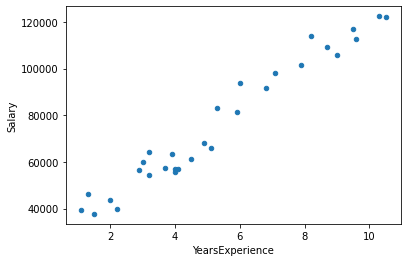

In [ ]:
df.plot(kind='scatter',x='YearsExperience',y='Salary')

Conclusion :

    We can observe linearity between features and target.
    its good to go with linear regression.

In [ ]:
#we have to divide the dataset into two parts that is.....dependant variable and independant variable
x=df.iloc[:,:-1].values           #independent variable
y=df.iloc[:,-1].values            #dependent variable


In [ ]:
#now using sklearn train and test the data by dividing the data again in train and test data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
model=LinearRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [ ]:
#y intercept
print(model.intercept_)
#slope
print(model.coef_)
# r square
print("Training accuracy : ",model.score(xtrain,ytrain))
print("Testing accuracy : ",model.score(xtest,ytest))

26777.391341197625
[9360.26128619]
Training accuracy :  0.9423777652193379
Testing accuracy :  0.9740993407213511


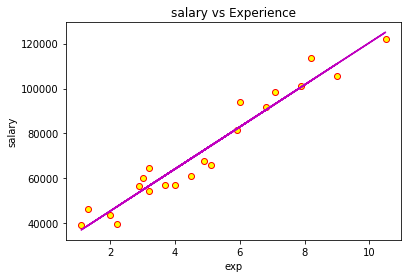

In [ ]:
#while plotting the actual values in the data set i.e x_train and y_train
plt.scatter(xtrain,ytrain,color='yellow', edgecolors='red')
plt.plot(xtrain,model.predict(xtrain),color='m')
plt.title("salary vs Experience")
plt.xlabel("exp")
plt.ylabel("salary")
plt.show()

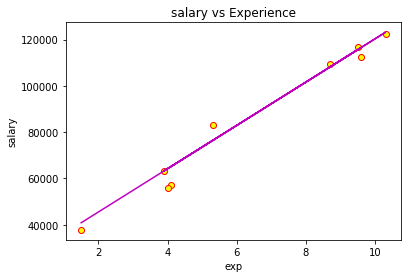

In [ ]:
#while plotting the predicted values in the data set i.e x_test and y_test
plt.scatter(xtest,ytest,color='yellow', edgecolors='red')
plt.plot(xtest,model.predict(xtest),color='m')            #trian line remains same while testing
plt.title("salary vs Experience")
plt.xlabel("exp")
plt.ylabel("salary")
plt.show()

In [ ]:
#demo prediction
prediction=model.predict([[3.2]])
print(prediction)

[56730.22745702]


In [ ]:
result=pd.DataFrame({"actual":ytest,"predicted":ypred.round(2)})
result

,actual,predicted
0,37731,40817.78
1,122391,123188.08
2,57081,65154.46
3,63218,63282.41
4,116969,115699.87
5,109431,108211.66
6,112635,116635.90
7,55794,64218.44
8,83088,76386.78


##Assumptions

In [ ]:
# mean of residuals
residuals = ytest-ypred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -1695.2654727997385


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


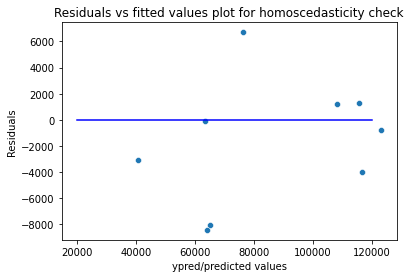

In [ ]:
# Check for homoscedasticity

p = sns.scatterplot(ypred,residuals)
plt.xlabel('ypred/predicted values')
plt.ylabel('Residuals')

p = sns.lineplot([20000,120000],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

Conclusion :

    We can't find any pattern 

In [ ]:
#Check homoscedasticity

import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, xtest)
lzip(name, test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[('F statistic', 1.6751651246214285), ('p-value', 0.3082972607285002)]

Conclusion : 
    
    Since p value is more than 0.05 in Goldfeld Quandt Test, 
    we can't reject it's null hypothesis that error terms are homoscedastic Good.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


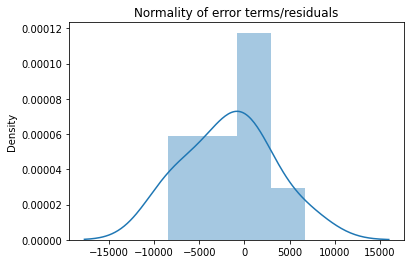

In [ ]:
# Normallity of error terms
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

Conclusion :

    We can find nearly normal distribution of residuals. 